In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('who_suicide_statistics.csv')

In [38]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [39]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


# *Analysis based on country*

In [41]:
df['country'].unique() # unique country names

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [42]:
country_suicides_gender = df.groupby(['country','sex'])['suicides_no'].sum()
country_suicides_gender # grouped stats of suicides numbers based on country and sex

country                             sex   
Albania                             female      693.0
                                    male       1277.0
Anguilla                            female        0.0
                                    male          2.0
Antigua and Barbuda                 female        1.0
                                               ...   
Venezuela (Bolivarian Republic of)  male      24204.0
Virgin Islands (USA)                female       19.0
                                    male         94.0
Zimbabwe                            female      257.0
                                    male        507.0
Name: suicides_no, Length: 282, dtype: float64

In [43]:
country_suicides = df.groupby(['country'])['suicides_no'].sum()
country_suicides #group stats of suicides number based on country only

country
Albania                                1970.0
Anguilla                                  2.0
Antigua and Barbuda                      11.0
Argentina                             93862.0
Armenia                                2422.0
                                       ...   
Uruguay                               14647.0
Uzbekistan                            44063.0
Venezuela (Bolivarian Republic of)    29504.0
Virgin Islands (USA)                    113.0
Zimbabwe                                764.0
Name: suicides_no, Length: 141, dtype: float64

In [44]:
top_suicidal_country = country_suicides.sort_values(ascending=False).head(10)
top_suicidal_country #top contries with highest suicides count

country
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Germany                      291262.0
Republic of Korea            261730.0
Brazil                       250824.0
Poland                       172562.0
United Kingdom               166314.0
Name: suicides_no, dtype: float64

In [45]:
gdf = df.groupby(['sex'])['suicides_no'].sum()
gdf # grouped based on sex

sex
female    1902272.0
male      6124183.0
Name: suicides_no, dtype: float64

# *Analysis based on male statistics*

In [46]:
df_m = df.loc[df['sex']=='male'] #getting only the stats of the male pupulation

In [47]:
country_male_suicides = df_m.groupby(['country'])['suicides_no'].sum()
country_male_suicides 

country
Albania                                1277.0
Anguilla                                  2.0
Antigua and Barbuda                      10.0
Argentina                             72471.0
Armenia                                1767.0
                                       ...   
Uruguay                               11559.0
Uzbekistan                            32066.0
Venezuela (Bolivarian Republic of)    24204.0
Virgin Islands (USA)                     94.0
Zimbabwe                                507.0
Name: suicides_no, Length: 141, dtype: float64

In [48]:
top_male_country = country_male_suicides.sort_values(ascending=False).head(10)
top_male_country

country
Russian Federation          1221474.0
United States of America     947792.0
Japan                        639281.0
Ukraine                      293561.0
France                       286881.0
Germany                      211555.0
Brazil                       194873.0
Republic of Korea            179115.0
Poland                       145589.0
United Kingdom               122935.0
Name: suicides_no, dtype: float64

# *Analysis based on female statistics*

In [49]:
df_f = df.loc[df['sex']=='female'] #getting only the stats of the female pupulation

In [50]:
country_female_suicides = df_f.groupby(['country'])['suicides_no'].sum()
country_female_suicides

country
Albania                                 693.0
Anguilla                                  0.0
Antigua and Barbuda                       1.0
Argentina                             21391.0
Armenia                                 655.0
                                       ...   
Uruguay                                3088.0
Uzbekistan                            11997.0
Venezuela (Bolivarian Republic of)     5300.0
Virgin Islands (USA)                     19.0
Zimbabwe                                257.0
Name: suicides_no, Length: 141, dtype: float64

In [51]:
top_female_country = country_female_suicides.sort_values(ascending=False).head(10)
top_female_country

country
Japan                       298333.0
Russian Federation          279518.0
United States of America    253609.0
France                      108619.0
Republic of Korea            82615.0
Germany                      79707.0
Ukraine                      71609.0
Brazil                       55951.0
United Kingdom               43379.0
Italy                        40517.0
Name: suicides_no, dtype: float64

# *Analysis based on age*

In [52]:
df['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [53]:
age_suicide = df.groupby(['age'])['suicides_no'].sum() 
age_suicide

age
15-24 years     984287.0
25-34 years    1367333.0
35-54 years    2895388.0
5-14 years       63312.0
55-74 years    1958468.0
75+ years       757667.0
Name: suicides_no, dtype: float64

In [54]:
male_age_suicide = df_m.groupby(['age'])['suicides_no'].sum()
male_age_suicide # suicides of male with different age group

age
15-24 years     762550.0
25-34 years    1109311.0
35-54 years    2286377.0
5-14 years       42668.0
55-74 years    1429445.0
75+ years       493832.0
Name: suicides_no, dtype: float64

In [55]:
female_age_suicide = df_f.groupby(['age'])['suicides_no'].sum()
female_age_suicide # suicides of female with different age group

age
15-24 years    221737.0
25-34 years    258022.0
35-54 years    609011.0
5-14 years      20644.0
55-74 years    529023.0
75+ years      263835.0
Name: suicides_no, dtype: float64

# *Analysis based on year statistics*

In [56]:
year_suicide = df.groupby(['year'])['suicides_no'].sum()
year_suicide #year wise suicides

year
1979     92790.0
1980    153548.0
1981    178014.0
1982    182893.0
1983    122430.0
1984    124427.0
1985    197533.0
1986    189225.0
1987    186364.0
1988    181416.0
1989    186043.0
1990    205507.0
1991    204756.0
1992    219100.0
1993    229243.0
1994    240628.0
1995    245915.0
1996    250353.0
1997    244322.0
1998    253279.0
1999    259984.0
2000    259905.0
2001    255071.0
2002    260401.0
2003    260429.0
2004    245249.0
2005    238622.0
2006    237200.0
2007    237211.0
2008    239368.0
2009    247324.0
2010    242243.0
2011    239972.0
2012    234085.0
2013    229421.0
2014    227793.0
2015    207908.0
2016     16483.0
Name: suicides_no, dtype: float64

In [57]:
male_year_suicide = df_m.groupby(['year'])['suicides_no'].sum()
female_year_suicide = df_f.groupby(['year'])['suicides_no'].sum()

# *Analysis of top countries*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Russian Federation'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Ukraine'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Republic of Korea'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'United Kingdom')])

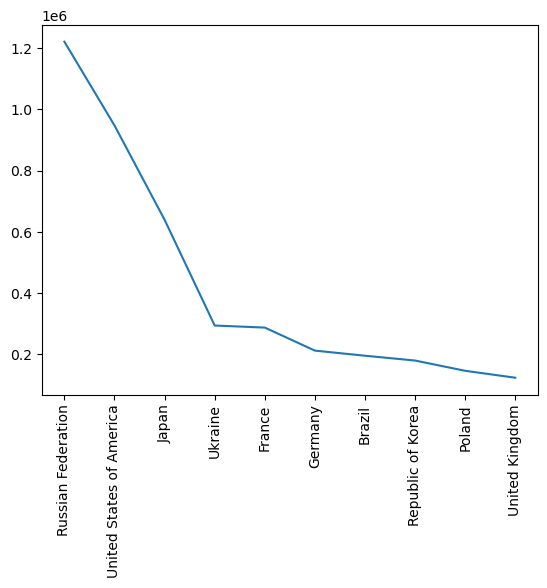

In [58]:
plt.plot(top_male_country)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Japan'),
  Text(1, 0, 'Russian Federation'),
  Text(2, 0, 'United States of America'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Republic of Korea'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Ukraine'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Italy')])

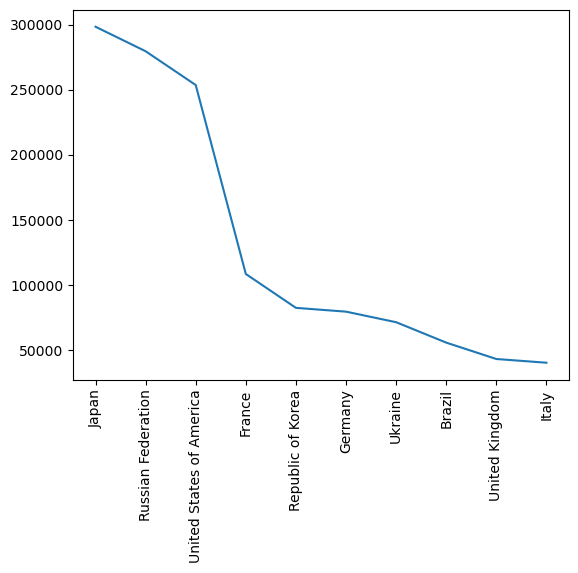

In [59]:
plt.plot(top_female_country)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Russian Federation'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Ukraine'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Republic of Korea'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'United Kingdom')])

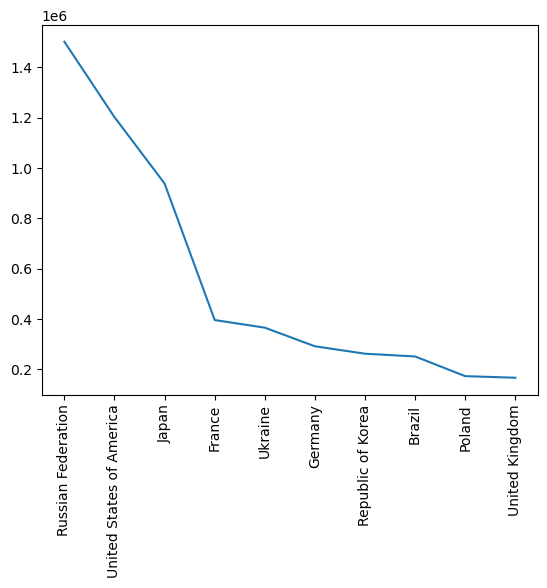

In [60]:
plt.plot(top_suicidal_country)
plt.xticks(rotation=90)

# *Visualization*

Suicides by top countries based on sex

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


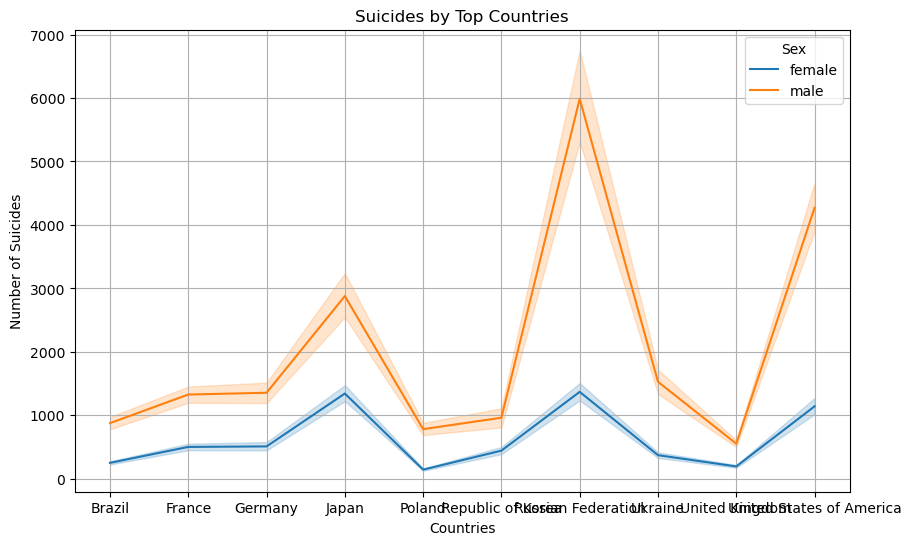

In [62]:

top_countries = df.groupby('country', as_index=False)['suicides_no'].sum()
top_countries = top_countries.nlargest(10, 'suicides_no')

top_suicidal_country_dict = dict.fromkeys(top_countries['country'].tolist(), True)

a = top_suicidal_country_dict.keys()
a = list(a)
df_top_countries = df.loc[df['country'].isin(a) ]
df_top_countries

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top_countries, x='country', y='suicides_no', hue='sex', markers=True)
plt.title('Suicides by Top Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Suicides')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

Top countries based on age group

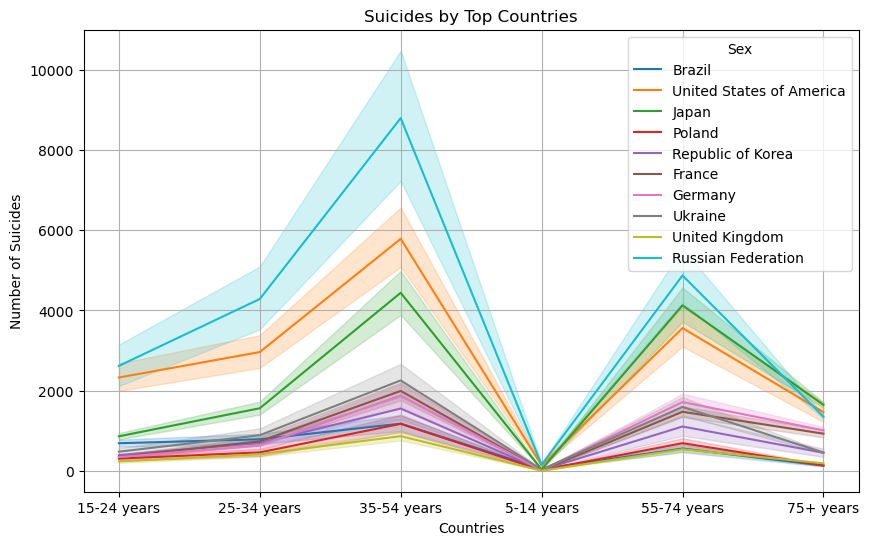

In [63]:
df_top_countries = df_top_countries.sort_values(by='age')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top_countries, x='age', y='suicides_no', hue='country', markers=True)
plt.title('Suicides by Top Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Suicides')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

Year wise stats for each countries.
<br>
It is advised to not do this as it will give the the plots of all the countries which are present in the dataset.
<br>
The plot will not give the benificial data visualization to the customer

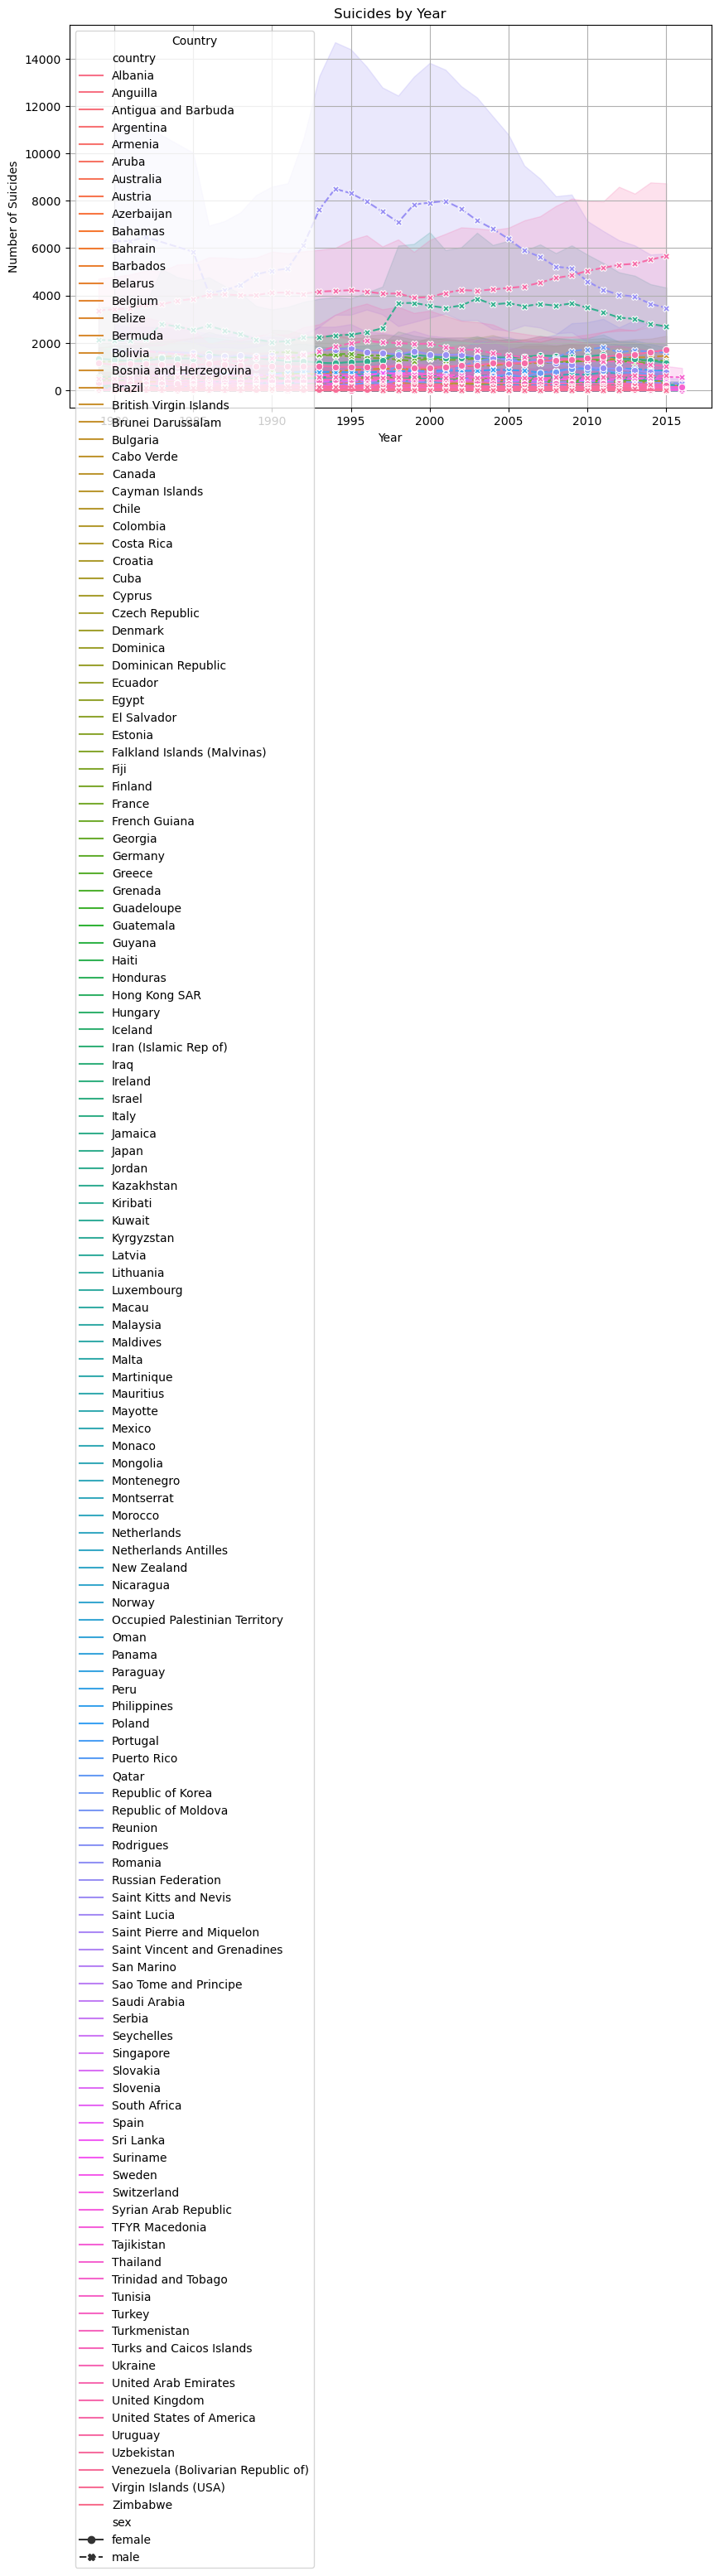

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='suicides_no', hue='country', style='sex', markers=True)
plt.title('Suicides by Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Country')
plt.grid(True)
plt.show()

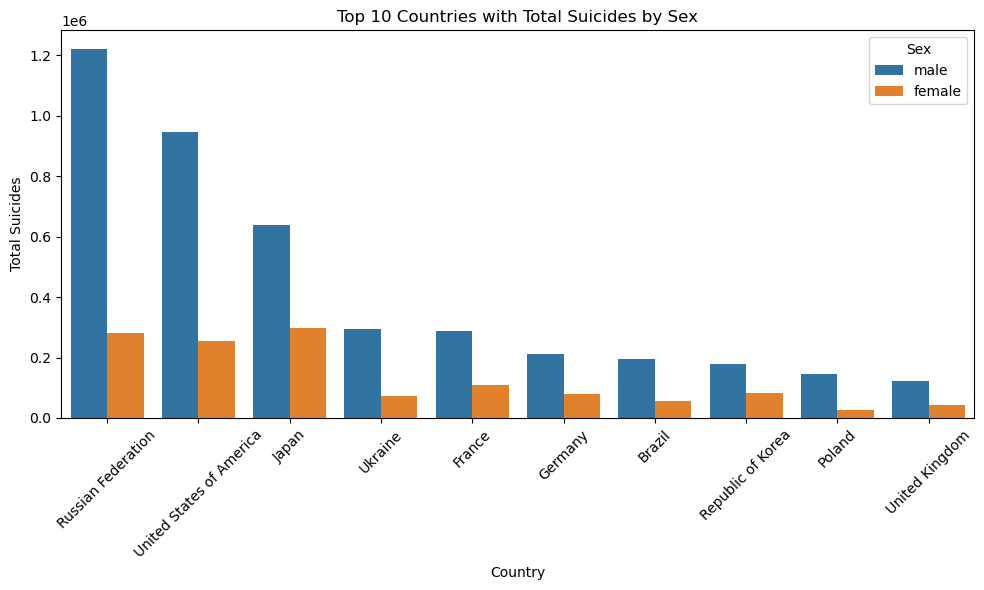

In [68]:
# Grouping by country and sex and summing the suicides_no
grouped = df.groupby(['country', 'sex'])['suicides_no'].sum().reset_index()

# Sorting the dataframe by suicides_no
sorted_df = grouped.sort_values(by='suicides_no', ascending=False)

top_10_countries = sorted_df['country'].unique()[:10]

# Filtering the dataframe for the top 10 countries
top_10_df = sorted_df[sorted_df['country'].isin(top_10_countries)]


plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_df, x='country', y='suicides_no', hue='sex')
plt.title('Top 10 Countries with Total Suicides by Sex')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


C:\Users\yusuf\AppData\Local\Temp\ipykernel_16608\2232583776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['percentage'] = (top_10_df['suicides_no'] / total_suicides) * 100


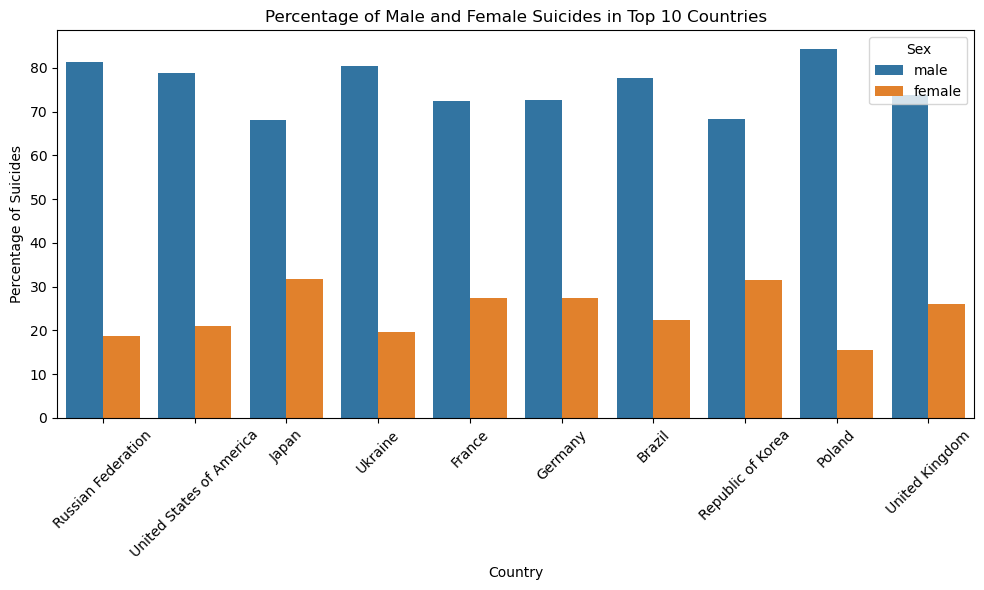

In [69]:
# Calculate percentages
total_suicides = top_10_df.groupby('country')['suicides_no'].transform('sum')
top_10_df['percentage'] = (top_10_df['suicides_no'] / total_suicides) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_df, x='country', y='percentage', hue='sex')
plt.title('Percentage of Male and Female Suicides in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Suicides')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


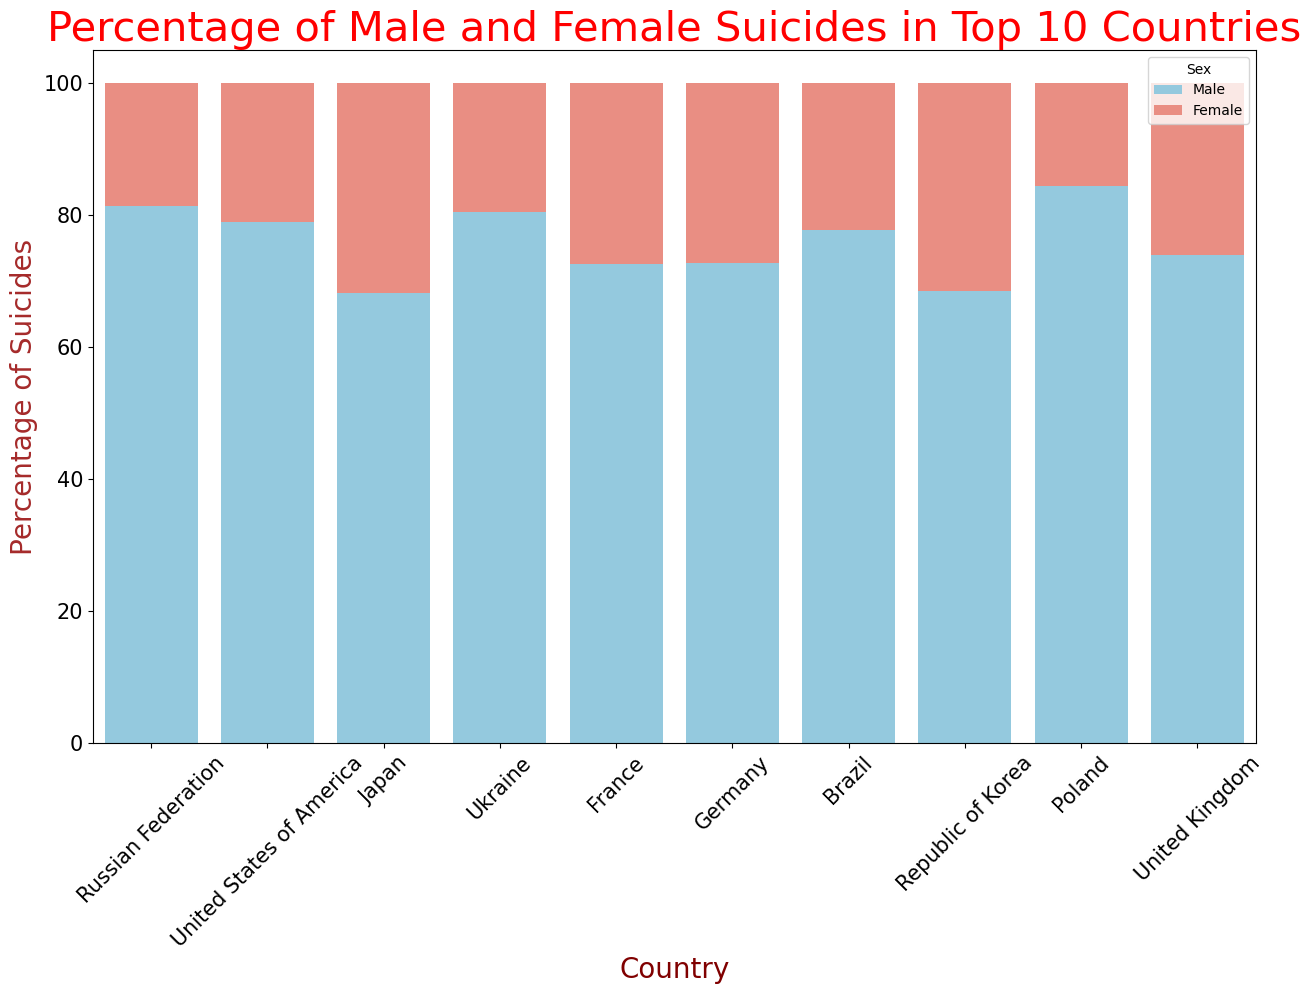

In [70]:
# Splitting the DataFrame into male and female
male_df = top_10_df[top_10_df['sex'] == 'male']
female_df = top_10_df[top_10_df['sex'] == 'female']

merged_df = male_df.merge(female_df, on='country', suffixes=('_male', '_female'))

plt.figure(figsize=(15, 9))
sns.barplot(data=merged_df, x='country', y='percentage_male', color='skyblue', label='Male')
sns.barplot(data=merged_df, x='country', y='percentage_female', color='salmon', label='Female', bottom=merged_df['percentage_male'])

plt.title('Percentage of Male and Female Suicides in Top 10 Countries',size=30,color='red')
plt.xlabel('Country',size=20,color='maroon')
plt.ylabel('Percentage of Suicides',size=20,color='brown')
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.legend(title='Sex')
plt.savefig('suicide_by_gender.png')
plt.show()


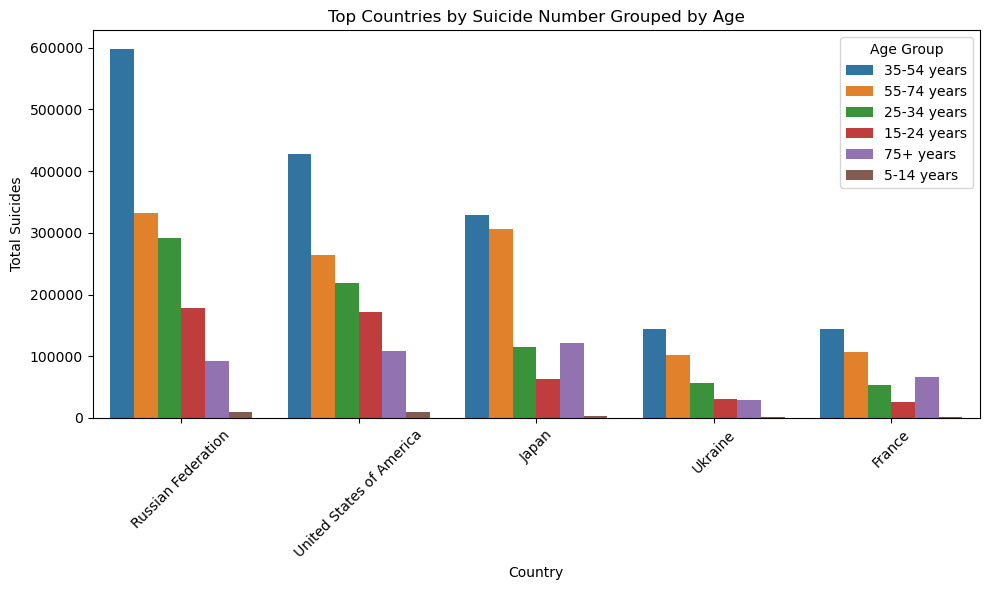

In [71]:
# Grouping the data by country and age and summing the suicides_no
grouped = df.groupby(['country', 'age'])['suicides_no'].sum().reset_index()

sorted_df = grouped.sort_values(by='suicides_no', ascending=False)
top_countries = sorted_df['country'].unique()[:5]

top_df = sorted_df[sorted_df['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, x='country', y='suicides_no', hue='age')
plt.title('Top Countries by Suicide Number Grouped by Age')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


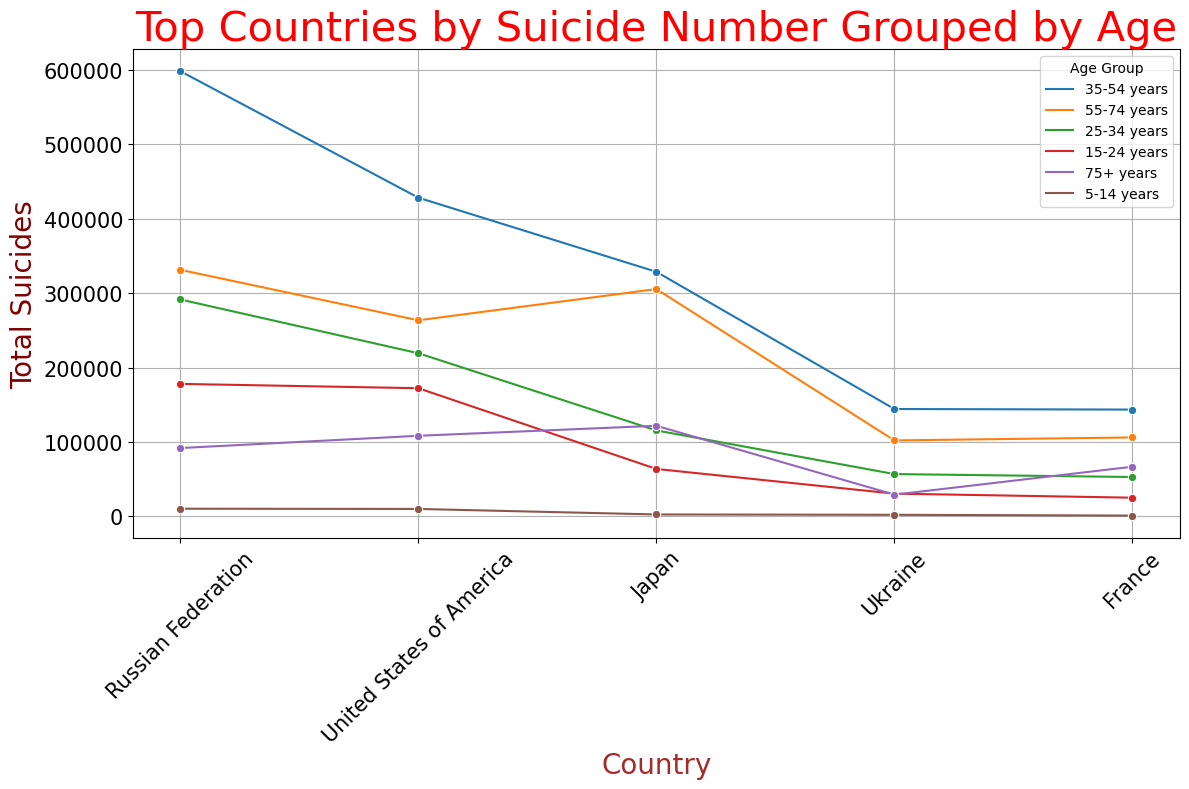

In [72]:
# Grouping the data by country and age and summing the suicides_no
grouped = df.groupby(['country', 'age'])['suicides_no'].sum().reset_index()

sorted_df = grouped.sort_values(by='suicides_no', ascending=False)

top_countries = sorted_df['country'].unique()[:5]
top_df = sorted_df[sorted_df['country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_df, x='country', y='suicides_no', hue='age', marker='o')
plt.title('Top Countries by Suicide Number Grouped by Age',size=30,color='red')
plt.xlabel('Country',size=20,color='brown')
plt.ylabel('Total Suicides',size=20,color='maroon')
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.savefig('suicide_by_age.png')
plt.show()


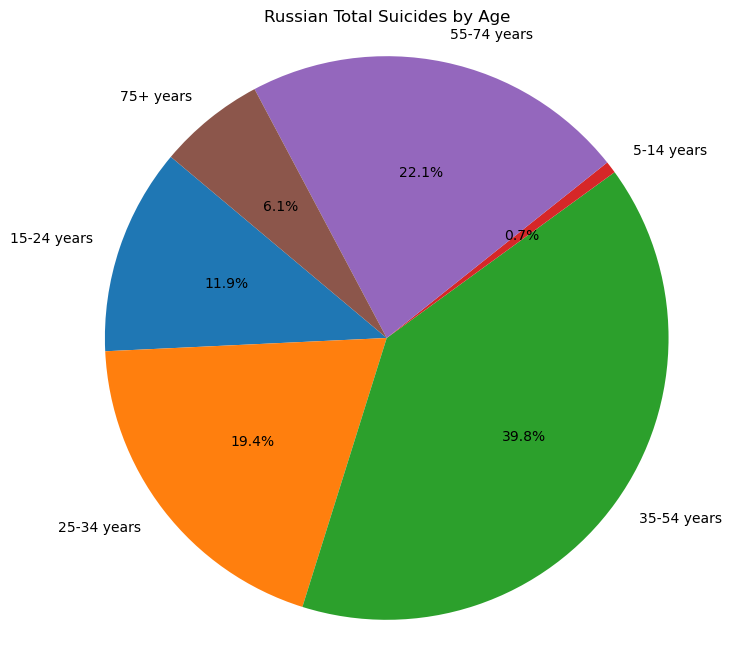

In [73]:
# Filter the data for Russian suicides
russian_data = df[df['country'] == 'Russian Federation']
russian_suicides_by_age = russian_data.groupby('age')['suicides_no'].sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(russian_suicides_by_age, labels=russian_suicides_by_age.index, autopct='%1.1f%%', startangle=140)
plt.title('Russian Total Suicides by Age')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


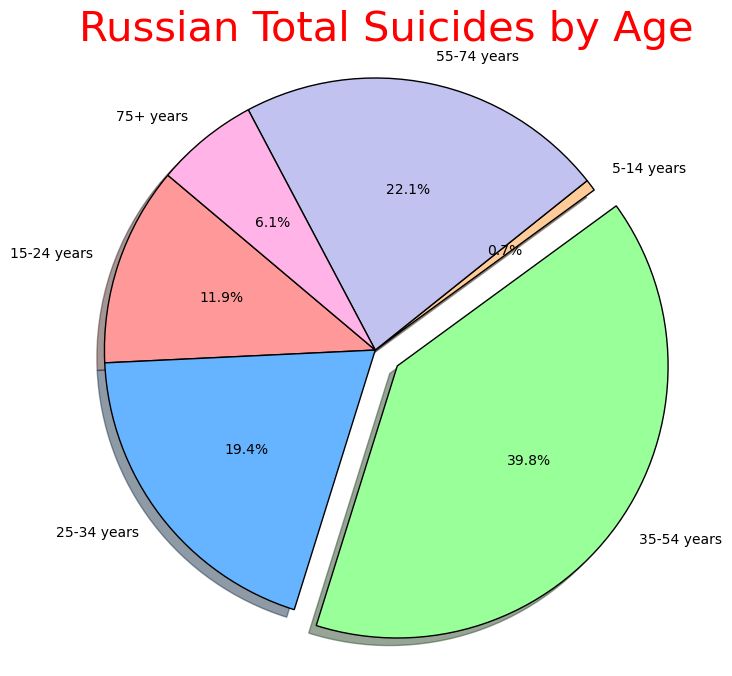

In [74]:
# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

explode = (0, 0, 0.1, 0, 0, 0)

# Plotting a pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(russian_suicides_by_age, labels=russian_suicides_by_age.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Russian Total Suicides by Age',color = 'red',size=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('russian_age_suicide.png')
plt.show()


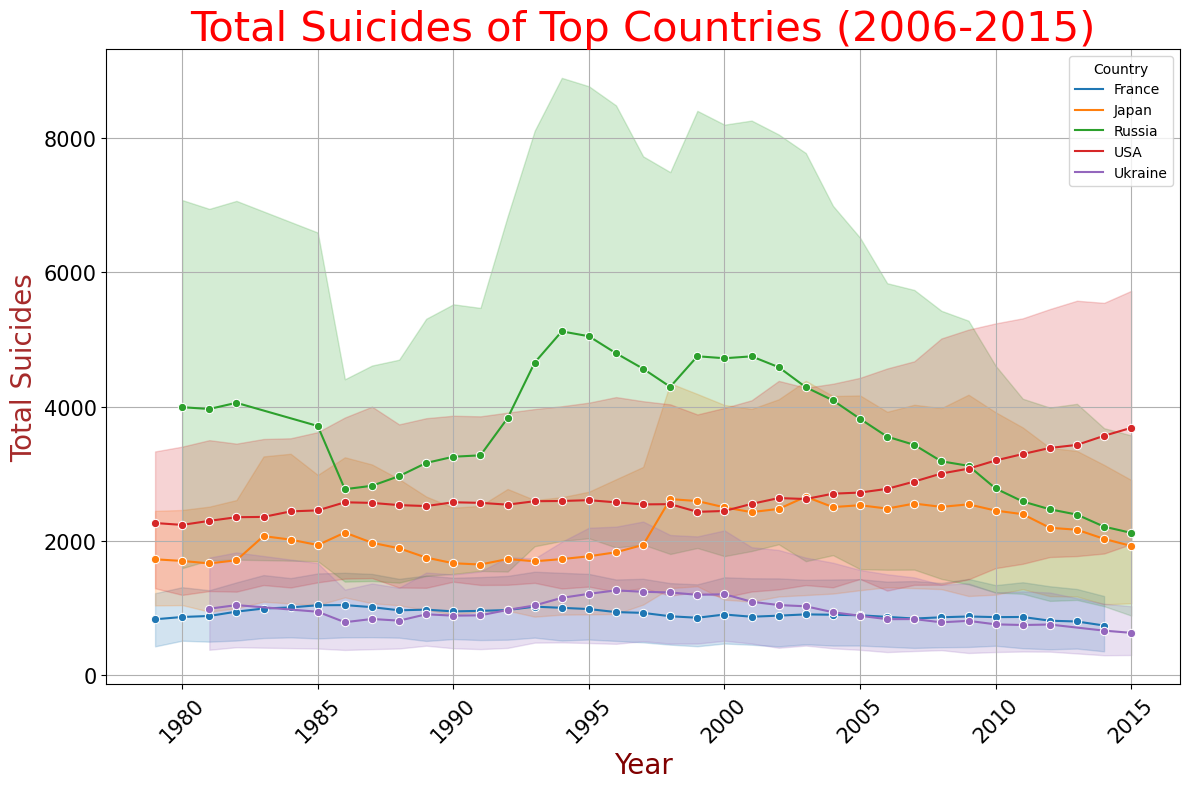

In [83]:
# Ensure 'suicides_no' column has no NaN values
df = df.dropna(subset=['suicides_no'])

top_countries = df.groupby('country', as_index=False)['suicides_no'].sum()
top_countries = top_countries.nlargest(5, 'suicides_no')

# Filter the original dataframe for only these top countries
top_df = df[df['country'].isin(top_countries['country'])].copy()
# Drop rows where 'year' is NaN
top_df = top_df.dropna(subset=['year'])
top_df = top_df.sort_values(by=['country', 'year'])

plt.figure(figsize=(12, 8))

sns.lineplot(data=top_df, x='year', y='suicides_no', hue='country', marker='o')

plt.title('Total Suicides of Top Countries (2006-2015)', size=30, color='red')
plt.xlabel('Year', size=20, color='maroon')
plt.ylabel('Total Suicides', size=20, color='brown')
plt.yticks(size=15)
plt.xticks(rotation=45, size=15)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

plt.savefig('total_suicides_top_countries.png')
plt.show()


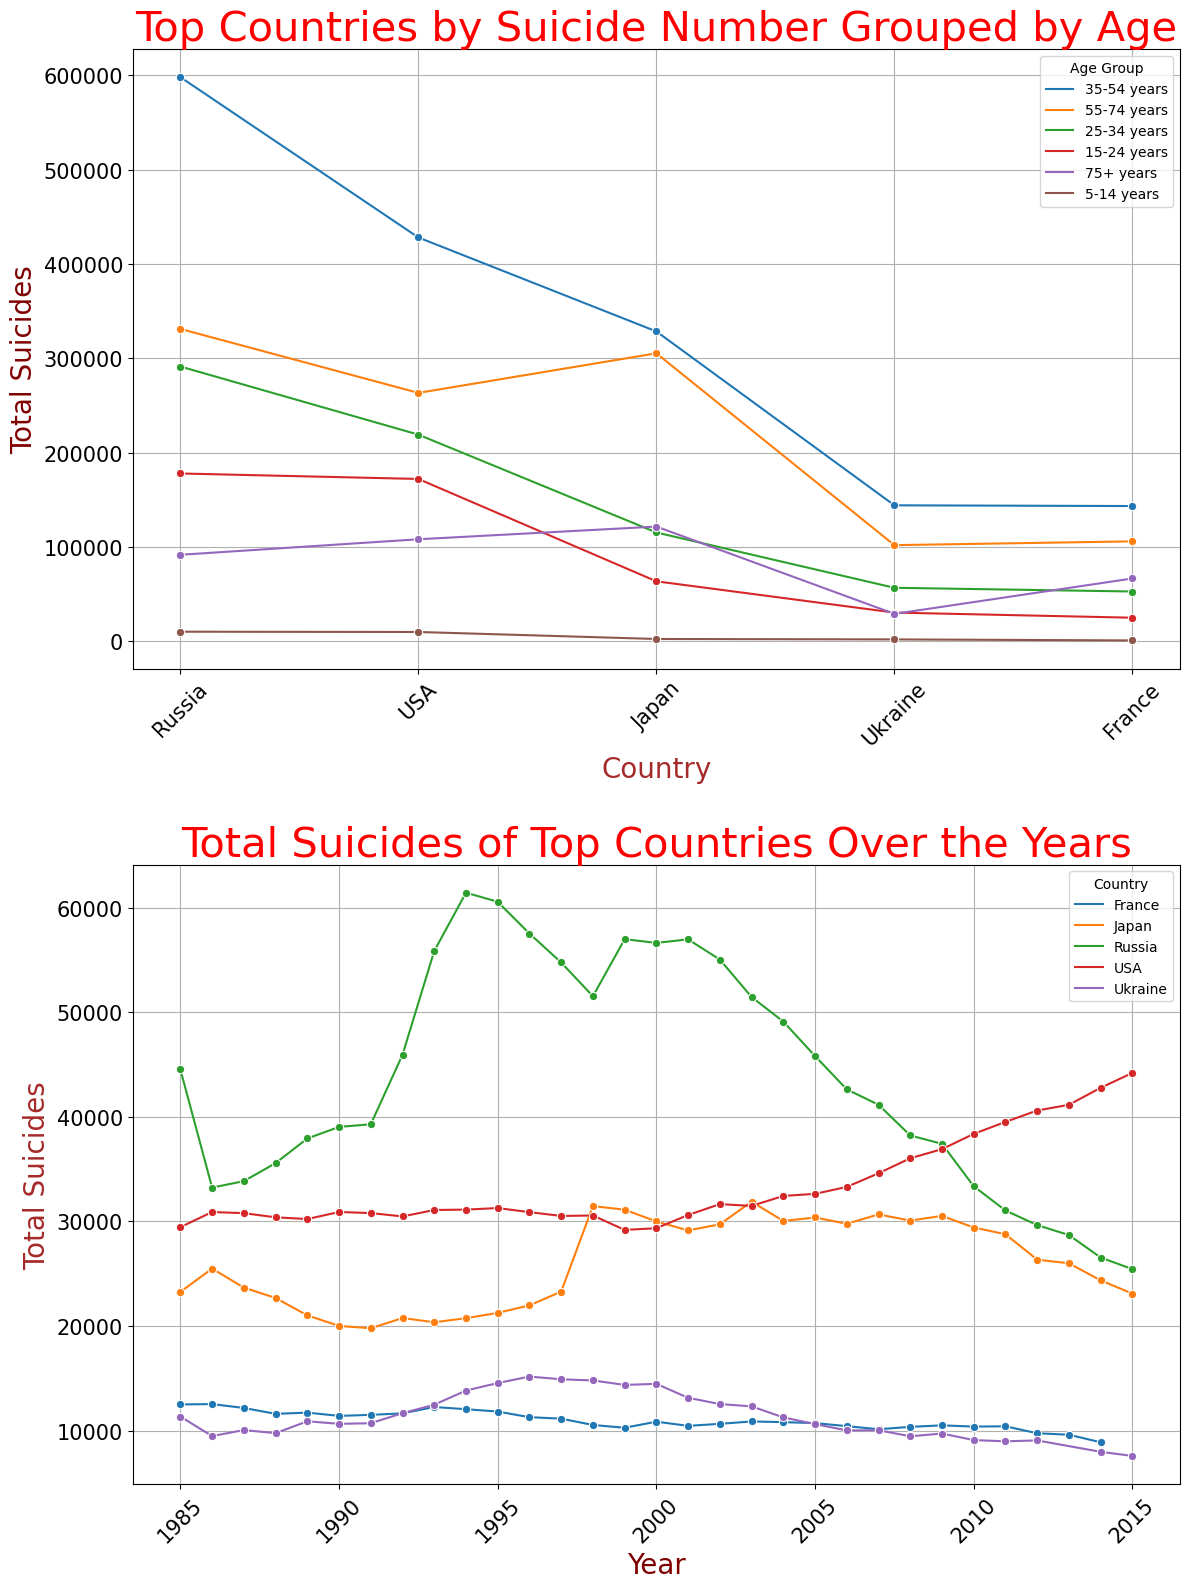

In [84]:
df['country'] = df['country'].replace({'Russian Federation': 'Russia', 'United States of America': 'USA'})

grouped = df.groupby(['country', 'age'])['suicides_no'].sum().reset_index()
sorted_df = grouped.sort_values(by='suicides_no', ascending=False)

top_countries = sorted_df['country'].unique()[:5]
top_df = sorted_df[sorted_df['country'].isin(top_countries)]

grouped_year = df.groupby(['year', 'country'])['suicides_no'].sum().reset_index()
top_df_year = grouped_year[grouped_year['country'].isin(top_countries)]
top_df_year = top_df_year[(top_df_year['year'] <= 2015) & (top_df_year['year']>=1985)]


# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [1, 1]})

# Plotting Top Countries by Suicide Number Grouped by Age
sns.lineplot(data=top_df, x='country', y='suicides_no', hue='age', marker='o', ax=axes[0])
axes[0].set_title('Top Countries by Suicide Number Grouped by Age', size=30, color='red')
axes[0].set_xlabel('Country', size=20, color='brown')
axes[0].set_ylabel('Total Suicides', size=20, color='maroon')
axes[0].tick_params(axis='x', rotation=45, labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].legend(title='Age Group')
axes[0].grid(True)

# Plotting Total Suicides of Top Countries Over the Years
sns.lineplot(data=top_df_year, x='year', y='suicides_no', hue='country', marker='o', ax=axes[1])
axes[1].set_title('Total Suicides of Top Countries Over the Years', size=30, color='red')
axes[1].set_xlabel('Year', size=20, color='maroon')
axes[1].set_ylabel('Total Suicides', size=20, color='brown')
axes[1].tick_params(axis='x', rotation=45, labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].legend(title='Country')
axes[1].grid(True)

# Adjust layout
plt.tight_layout(h_pad=3)

# Save the plot
#plt.savefig('suicide_analysis_subplots.png')

# Show the plot
plt.show()


C:\Users\yusuf\AppData\Local\Temp\ipykernel_16608\3583853715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['country'] = male_df['country'].replace({'Russian Federation': 'Russia', 'United States of America': 'USA'})
C:\Users\yusuf\AppData\Local\Temp\ipykernel_16608\3583853715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['country'] = female_df['country'].replace({'Russian Federation': 'Russia', 'United States of America': 'USA'})


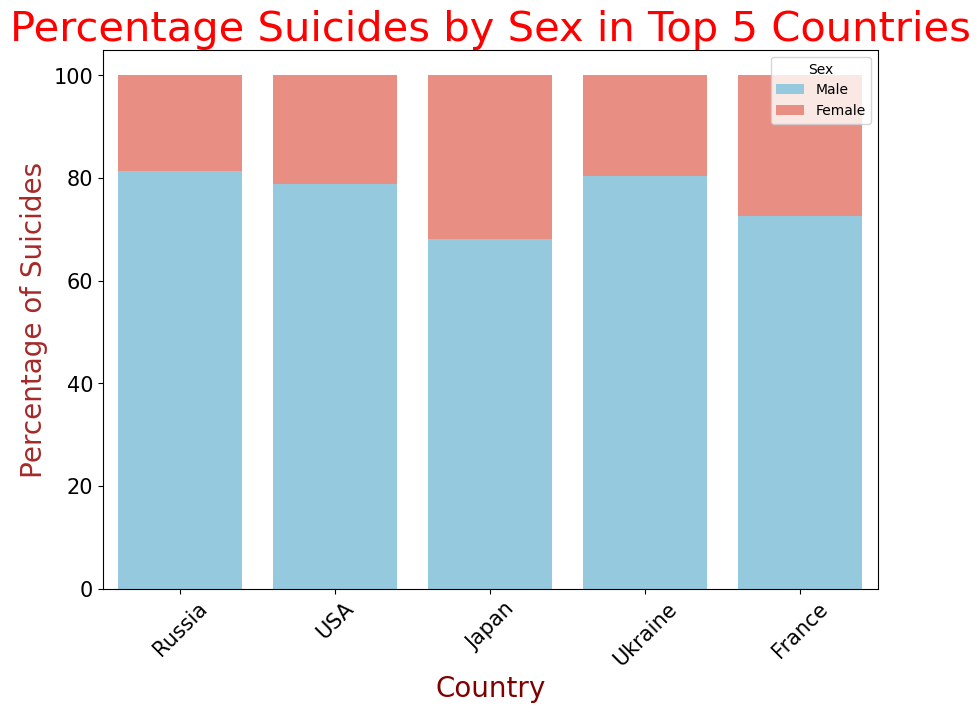

In [77]:
# Selecting the top 5 countries
top_5_countries = sorted_df['country'].unique()[:5]


male_df['country'] = male_df['country'].replace({'Russian Federation': 'Russia', 'United States of America': 'USA'})
female_df['country'] = female_df['country'].replace({'Russian Federation': 'Russia', 'United States of America': 'USA'})

# Filtering male and female dataframes for the top 5 countries
male_df_top_5 = male_df[male_df['country'].isin(top_5_countries)]
female_df_top_5 = female_df[female_df['country'].isin(top_5_countries)]

merged_df_top_5 = male_df_top_5.merge(female_df_top_5, on='country', suffixes=('_male', '_female'))

plt.figure(figsize=(10, 7))

sns.barplot(data=merged_df_top_5, x='country', y='percentage_male', color='skyblue', label='Male')
sns.barplot(data=merged_df_top_5, x='country', y='percentage_female', color='salmon', label='Female', bottom=merged_df_top_5['percentage_male'])

plt.title('Percentage Suicides by Sex in Top 5 Countries', size=30, color='red')
plt.xlabel('Country', size=20, color='maroon')
plt.ylabel('Percentage of Suicides', size=20, color='brown')
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(title='Sex')
#plt.savefig('suicide_by_gender_top5.png')
plt.show()


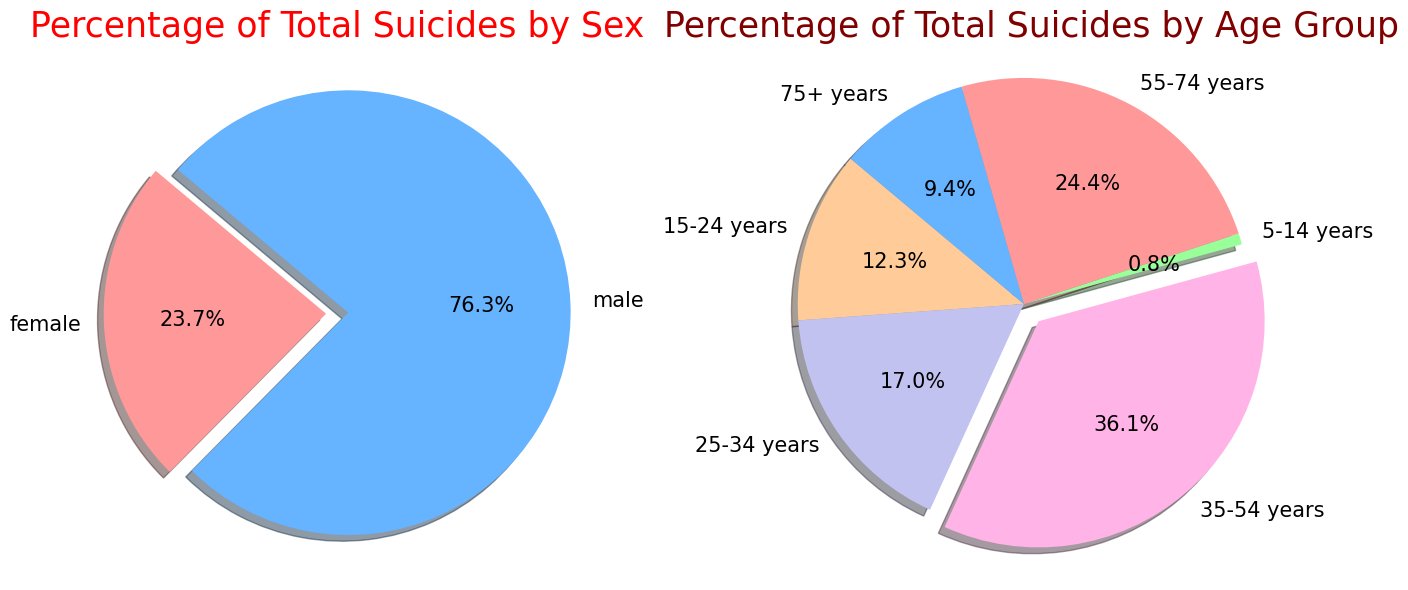

In [86]:
percentages_sex = df.groupby('sex')['suicides_no'].sum()
percentages_sex = (percentages_sex / percentages_sex.sum()) * 100  

percentages_age = df.groupby('age')['suicides_no'].sum()
percentages_age = (percentages_age / percentages_age.sum()) * 100  

colors_sex = ['#ff9999', '#66b3ff'] 
colors_age = ['#ffcc99', '#c2c2f0', '#ffb3e6', '#99ff99', '#ff9999', '#66b3ff'] 

explode_sex = (0.1, 0)

explode_age = (0, 0, 0.1, 0, 0, 0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.8) 

axes[0].pie(percentages_sex, labels=percentages_sex.index, autopct='%1.1f%%', startangle=140, colors=colors_sex, explode=explode_sex, shadow=True,textprops={'fontsize':15})
axes[0].set_title('Percentage of Total Suicides by Sex',size=25,color='red')

axes[1].pie(percentages_age, labels=percentages_age.index, autopct='%1.1f%%', startangle=140, colors=colors_age, explode=explode_age, shadow=True,textprops={'fontsize':15})
axes[1].set_title('Percentage of Total Suicides by Age Group',size=25,color='maroon')

axes[0].axis('equal')
axes[1].axis('equal')

# Display the plot
plt.tight_layout()
plt.show()


In [87]:
grouped_sex = df.groupby('sex')['suicides_no'].sum()
grouped_age = df.groupby('age')['suicides_no'].sum()
print(grouped_sex)
print(grouped_age)

sex
female    1902272.0
male      6124183.0
Name: suicides_no, dtype: float64
age
15-24 years     984287.0
25-34 years    1367333.0
35-54 years    2895388.0
5-14 years       63312.0
55-74 years    1958468.0
75+ years       757667.0
Name: suicides_no, dtype: float64


In [88]:
import plotly.graph_objects as go

colors_sex = ['#ff9999', '#66b3ff'] 
colors_age = ['#ffcc99', '#c2c2f0', '#ffb3e6', '#99ff99', '#ff9999', '#66b3ff']  

explode_sex = (0.1, 0)
explode_age = (0, 0, 0.1, 0, 0, 0)

fig1 = go.Figure(data=[go.Pie(labels=percentages_sex.index, values=percentages_sex.values,
                              hole=0.3, pull=[0.1, 0], marker=dict(colors=colors_sex, line=dict(color='#000000', width=2)))])
fig1.update_layout(title_text='Percentage of Total Suicides by Sex', title_font_size=25, title_x=0.5, title_y=0.9)


fig2 = go.Figure(data=[go.Pie(labels=percentages_age.index, values=percentages_age.values,
                              hole=0.3, pull=[0, 0, 0.1, 0, 0, 0], marker=dict(colors=colors_age, line=dict(color='#000000', width=2)))])
fig2.update_layout(title_text='Percentage of Total Suicides by Age Group', title_font_size=25, title_x=0.5, title_y=0.9)

# Display the plots
fig1.show()
fig2.show()



In [89]:

colors_sex = ['#ff9999', '#66b3ff'] 
colors_age = ['#ffcc99', '#c2c2f0', '#ffb3e6', '#99ff99', '#ff9999', '#66b3ff'] 

explode_sex = (0.1, 0)
explode_age = (0, 0, 0.1, 0, 0, 0)

fig1 = go.Figure(data=[go.Pie(labels=percentages_sex.index, values=percentages_sex.values,
                              hole=0.3, pull=[0.1, 0], marker=dict(colors=colors_sex, line=dict(color='#000000', width=2)))])
fig1.update_layout(title_text='Percentage of Total Suicides by Sex', title_font_size=25, title_x=0.5, title_y=0.9)

fig2 = go.Figure(data=[go.Pie(labels=percentages_age.index, values=percentages_age.values,
                              hole=0.3, pull=[0, 0, 0.1, 0, 0, 0], marker=dict(colors=colors_age, line=dict(color='#000000', width=2)))])
fig2.update_layout(title_text='Percentage of Total Suicides by Age Group', title_font_size=25, title_x=0.5, title_y=0.9)

# Save the figures as HTML files
fig1.write_html('percentage_suicides_sex_plotly.html')
fig2.write_html('percentage_suicides_age_plotly.html')

# Display the plots
fig1.show()
fig2.show()


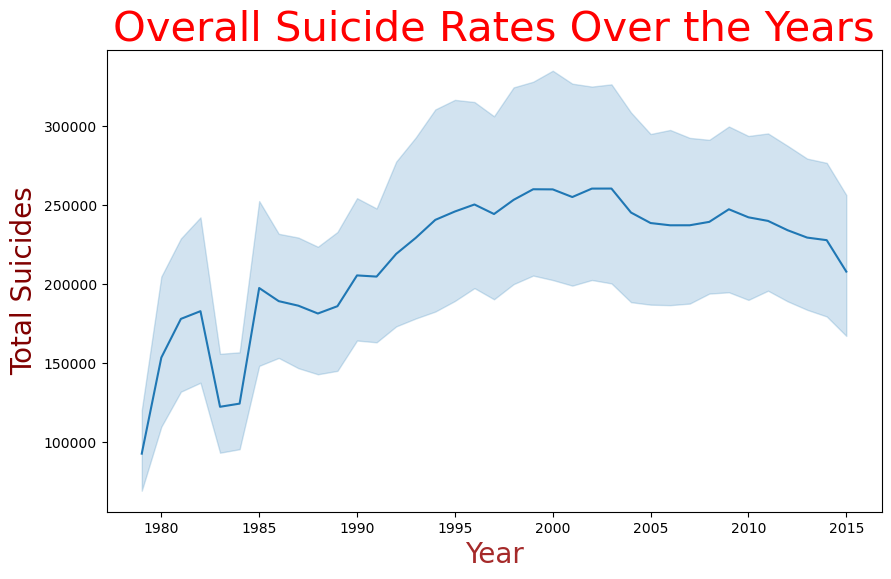

In [90]:

df_filtered = df[df['year'] < 2016]

# Plotting overall suicide rates over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='year', y='suicides_no', estimator='sum')
plt.title('Overall Suicide Rates Over the Years', color='red', size=30)
plt.xlabel('Year', color='brown', size=20)
plt.ylabel('Total Suicides', color='maroon', size=20)
plt.show()


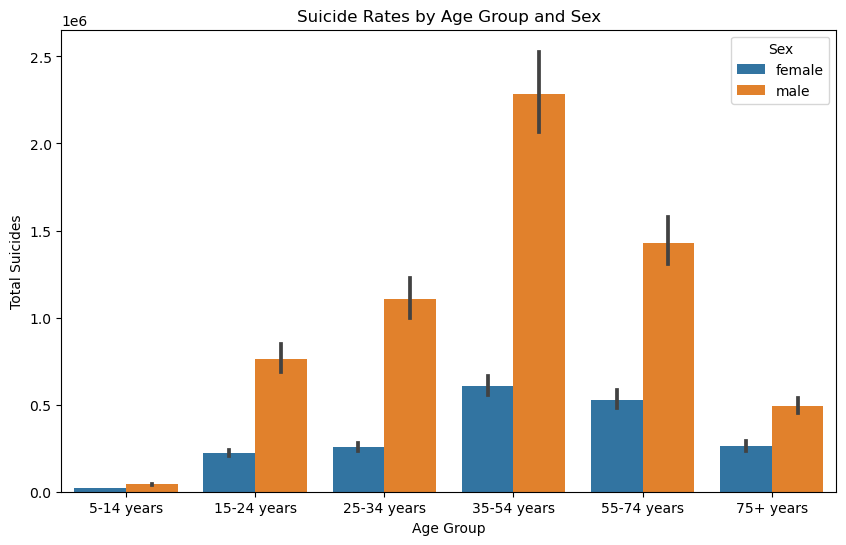

In [93]:
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age', y='suicides_no', hue='sex', estimator='sum',order=age_order)
plt.title('Suicide Rates by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.legend(title='Sex')
plt.show()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_16608\3344095696.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




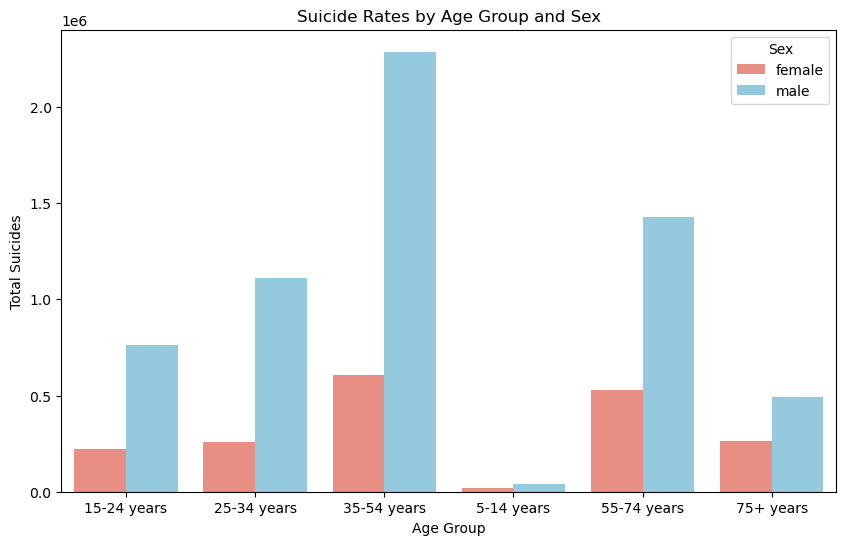

In [94]:
# Group the data by age and sex and sum the suicides_no
grouped = df.groupby(['age', 'sex'])['suicides_no'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='age', y='suicides_no', hue='sex', estimator=sum, ci=None, palette={'male': 'skyblue', 'female': 'salmon'})
plt.title('Suicide Rates by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.legend(title='Sex')
plt.show()


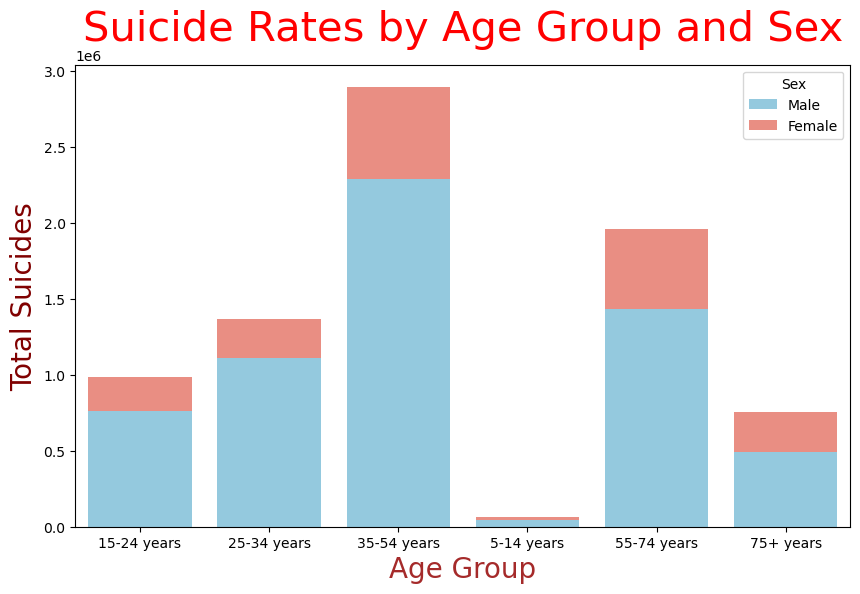

In [95]:
# Group the data by age and sex and sum the suicides_no
grouped = df.groupby(['age', 'sex'])['suicides_no'].sum().reset_index()

# Separate the data for male and female
male_data = grouped[grouped['sex'] == 'male']
female_data = grouped[grouped['sex'] == 'female']

plt.figure(figsize=(10, 6))

# Plotting male bars
sns.barplot(data=male_data, x='age', y='suicides_no', color='skyblue', label='Male')

# Plotting female bars on top of male bars using the bottom parameter
sns.barplot(data=female_data, x='age', y='suicides_no', color='salmon', label='Female', bottom=male_data['suicides_no'])

plt.title('Suicide Rates by Age Group and Sex',size=30,color='red')
plt.xlabel('Age Group',size=20,color='brown')
plt.ylabel('Total Suicides',size=20,color='maroon')
plt.legend(title='Sex')
plt.show()


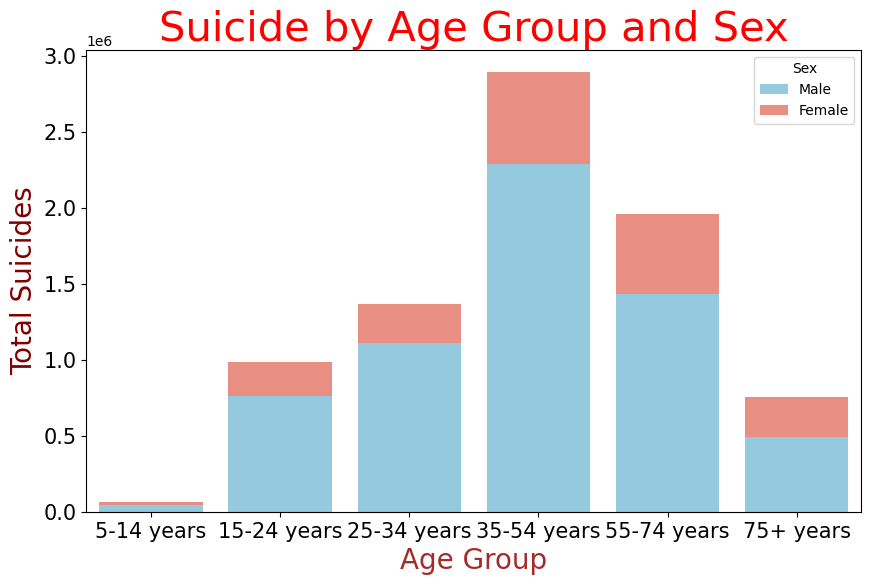

In [96]:

age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
colors_age = ['#ffcc99', '#c2c2f0', '#ffb3e6', '#99ff99', '#ff9999', '#66b3ff']  

plt.figure(figsize=(10, 6))

male_bars = sns.barplot(data=male_data, x='age', y='suicides_no', color='skyblue', label='Male', order=age_order)

male_heights = [bar.get_height() for bar in male_bars.patches]

sns.barplot(data=female_data, x='age', y='suicides_no', color='salmon', label='Female', order=age_order,
            bottom=male_heights)

plt.title('Suicide by Age Group and Sex',size=30,color='red')
plt.xlabel('Age Group',size=20,color='brown')
plt.ylabel('Total Suicides',size=20,color='maroon')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(title='Sex')
plt.show()


In [98]:
from sklearn.linear_model import LinearRegression

total_sum = df.groupby('year')['suicides_no'].sum()

X = total_sum.index.values.reshape(-1, 1)  # Years
y = total_sum.values  # Suicides

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting suicide rates for the next 5 years
future_years = np.arange(X[-1] + 1, X[-1] + 6).reshape(-1, 1)  # Next 5 years
future_suicides = model.predict(future_years)

# Print the predicted suicide rates for the next 5 years
print("Predicted Suicide Rates for the Next 5 Years:")
for year, suicides in zip(future_years.flatten(), future_suicides):
    print(f"Year {int(year)}: Predicted Suicides {int(suicides)}")


Predicted Suicide Rates for the Next 5 Years:
Year 2017: Predicted Suicides 245332
Year 2018: Predicted Suicides 247081
Year 2019: Predicted Suicides 248830
Year 2020: Predicted Suicides 250579
Year 2021: Predicted Suicides 252328


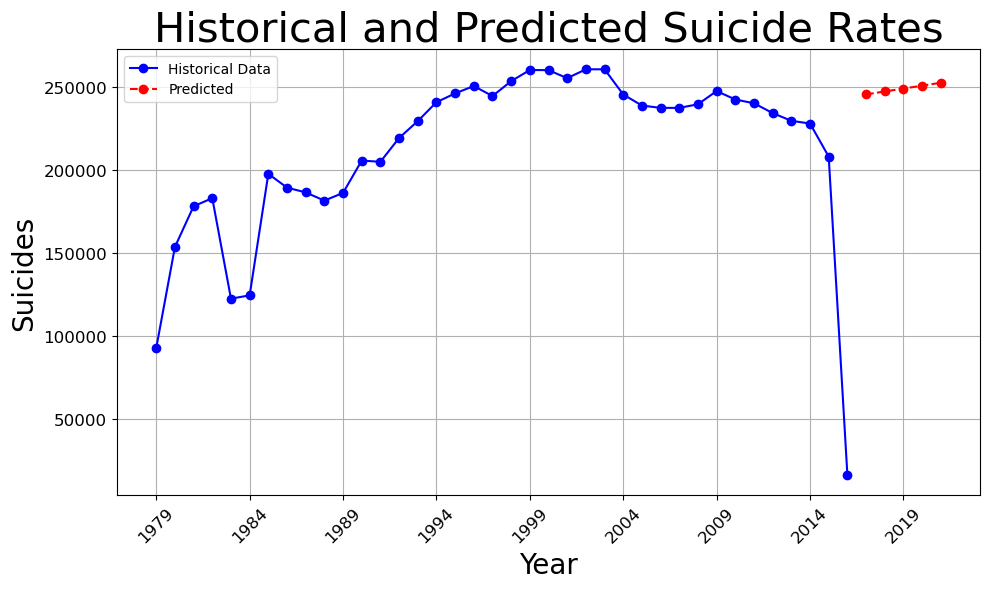

In [ ]:
# Plotting historical data
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', linestyle='-', label='Historical Data', color='blue')

# Plotting predicted suicide rates for the next 5 years
plt.plot(future_years, future_suicides, marker='o', linestyle='--', label='Predicted', color='red')

plt.title('Historical and Predicted Suicide Rates',size=30)
plt.xlabel('Year',size=20)
plt.ylabel('Suicides',size=20)

plt.xticks(np.arange(X[0], future_years[-1] + 1, 5), size=12, rotation=45)
plt.yticks(size=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
